### ニュートン法

In [1]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new

In [2]:
def f(x):
    return x**3 - 5 * x + 1

def df(x):
    return 3 * x**2 - 5

In [3]:
print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

2.1284190638445777
0.20163967572340463
-2.330058739567982


In [4]:
import numpy as np
from numpy import linalg

In [6]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(linalg.inv(df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x - x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def f1(x, y):
    return x**3 -2 * y

def f2(x, y):
    return x**2 + y**2 - 1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3 * x**2, -2], [2 * x, 2 * y]])

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


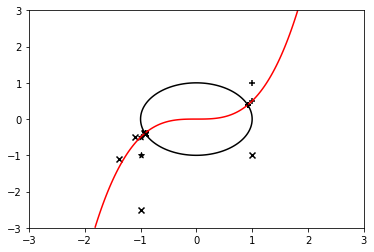

In [9]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors='r', levels=[0])
plt.contour(xmesh, ymesh, z2, colors='k', levels=[0])
solver = Newton(f, df)

initials = [np.array([1, 1]),
               np.array([-1, -1]),
               np.array([1, -1])]
markers = ['+', '*', 'x']

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
                       solver.path_[:, 1],
                        color='k',
                       marker=m)
    print(sol)